In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data=pd.read_csv("C:/Users/laasya/OneDrive/Desktop/data science/Customers.csv")

In [6]:
data.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
data.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [8]:
data.shape

(200, 4)

In [9]:
data.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

In [10]:
data['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [11]:
data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [12]:
student=data.drop(['CustomerID','Region'],axis=1)

In [13]:
student.head()

,CustomerName,SignupDate
0,Lawrence Carroll,2022-07-10
1,Elizabeth Lutz,2022-02-13
2,Michael Rivera,2024-03-07
3,Kathleen Rodriguez,2022-10-09
4,Laura Weber,2022-08-15


In [16]:
corelation=student.corr()

ValueError: could not convert string to float: 'Lawrence Carroll'

Dataset Overview:
Shape: (200, 4)

Columns and Data Types:
 CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Summary Statistics:
        CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN            

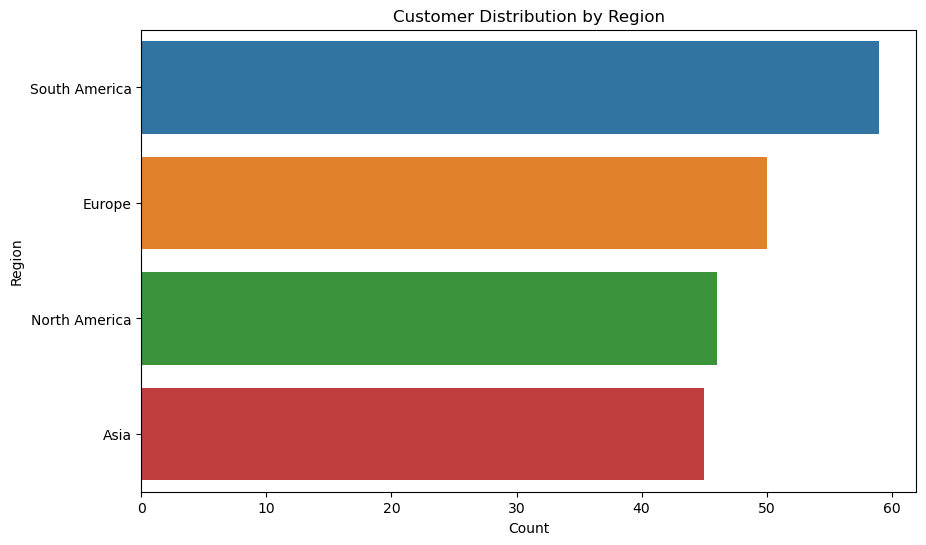

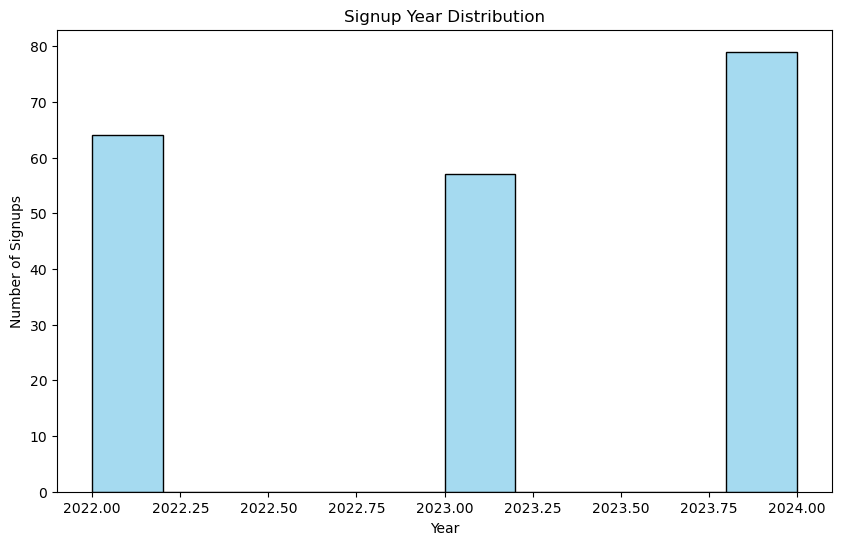

<Figure size 1000x600 with 0 Axes>

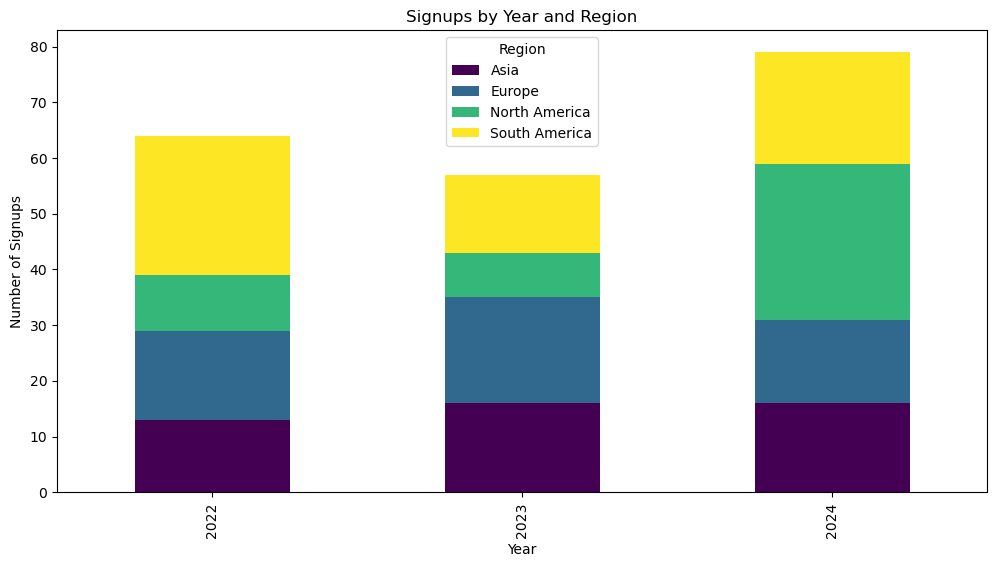

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'C:/Users/laasya/OneDrive/Desktop/data science/Customers.csv'
data = pd.read_csv(file_path)

# Convert SignupDate to datetime format
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

# General overview of the dataset
def dataset_overview(df):
    print("Dataset Overview:")
    print(f"Shape: {df.shape}")
    print("\nColumns and Data Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSummary Statistics:\n", df.describe(include='all'))

# Univariate analysis
def univariate_analysis(df):
    print("\nValue Counts for Region:")
    print(df['Region'].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index)
    plt.title('Customer Distribution by Region')
    plt.xlabel('Count')
    plt.ylabel('Region')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['SignupDate'].dt.year, bins=10, kde=False, color='skyblue')
    plt.title('Signup Year Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Signups')
    plt.show()

# Bivariate analysis
def bivariate_analysis(df):
    plt.figure(figsize=(10, 6))
    region_counts = df.groupby(df['SignupDate'].dt.year)['Region'].value_counts().unstack()
    region_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
    plt.title('Signups by Year and Region')
    plt.xlabel('Year')
    plt.ylabel('Number of Signups')
    plt.legend(title='Region')
    plt.show()

# Run analysis
if __name__ == "__main__":
    dataset_overview(data)
    univariate_analysis(data)
    bivariate_analysis(data)


In [19]:
# Load the datasets for Customers and Products
customers_path = 'C:/Users/laasya/OneDrive/Desktop/data science/Customers.csv'
products_path = 'C:/Users/laasya/OneDrive/Desktop/data science/Products.csv'


customers_data = pd.read_csv(customers_path)
products_data = pd.read_csv(products_path)

# Preview the datasets
customers_data.head(), products_data.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31)

In [21]:
# Merge datasets on CustomerID
merged_data = pd.merge(Transactions_data, customers_data, on="CustomerID")

# Feature engineering: Aggregate transaction data for each customer
agg_data = merged_data.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],  # Total spend, average spend
    "TransactionID": "count",       # Number of transactions
    "TransactionDate": "min"        # First transaction date
}).reset_index()

# Flatten MultiIndex columns
agg_data.columns = ["CustomerID", "TotalSpend", "AverageSpend", "TransactionCount", "FirstTransactionDate"]

# Calculate customer tenure (days since first transaction)
agg_data["FirstTransactionDate"] = pd.to_datetime(agg_data["FirstTransactionDate"])
agg_data["Tenure"] = (pd.Timestamp.now() - agg_data["FirstTransactionDate"]).dt.days

# Add region from customer data
agg_data = pd.merge(agg_data, customers_data[["CustomerID", "Region"]], on="CustomerID")

# Prepare data for clustering (drop categorical and unnecessary columns)
clustering_data = agg_data.drop(columns=["CustomerID", "FirstTransactionDate", "Region"])

# Display the processed data
agg_data.head(), clustering_data.head()


NameError: name 'Transactions_data' is not defined